# Visualize Prediction

## Imports and Functions

In [1]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape

import os
import numpy as np
import sys
import tensorflow as tf
import random
import keras

SEED = 42

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    keras.utils.set_random_seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

FIRST_YEAR= 1972
FREQUENCY= "monthly"

c:\Users\marti\Desktop\data\hw_extra


In [3]:
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    PredictionExperiment,
    PredictionModel,
    get_info_experiment,
    SERA
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]
bounds = (-1.1692892810242344, -0.30647585455315646, 4.561547586528888, 6.499969486244418)

## Chile good predictions whole year

In [5]:
region="chile"
metadata = pd.read_csv(f"data/climate_features/{region}/metadata.csv")
metadata.reset_index(inplace=True, drop=True)
display(metadata)

,id,filename,season,indices
0,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
1,978f49d7,predictor_978f49d7_2.parquet,2,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,978f49d7,predictor_978f49d7_3.parquet,3,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,978f49d7,predictor_978f49d7_4.parquet,4,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
4,978f49d7,predictor_978f49d7_5.parquet,5,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
...,...,...,...,...
247,458d357c,predictor_458d357c_8.parquet,8,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
248,458d357c,predictor_458d357c_9.parquet,9,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
249,458d357c,predictor_458d357c_10.parquet,10,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
250,458d357c,predictor_458d357c_11.parquet,11,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


### Year

In [ ]:
ids_to_execute = ["978f49d7"]
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
43701738,index_43701738.parquet,anom,1,SP,282|290|-34|-30,1980-2010,1972-2022
e306f58b,index_e306f58b.parquet,anom,1,SP,282|290|-38|-34,1980-2010,1972-2022
e601b072,index_e601b072.parquet,anom,1,SP,282|290|-43|-38,1980-2010,1972-2022
ecaf68aa,index_ecaf68aa.parquet,anom,1,SP,282|290|-56|-43,1980-2010,1972-2022
711b08fc,index_711b08fc.parquet,max,1,SP,220|280|-35|-10,NoRef,1972-2022
89595d7b,index_89595d7b.parquet,anom,1,U10,282|290|-37|-30,1980-2010,1972-2022
PDO,pdo.dat,EOF,1,SSTAnom,110|260|20|70,unknown,1972-2022


### First SERA

Executing 978f49d7 iter 1
Train predicting  1 RNN16
Epoch 1/200
69/69 [==============================] - 17s 65ms/step - loss: 17.7976 - val_loss: 22.0092
Epoch 2/200
69/69 [==============================] - 0s 3ms/step - loss: 16.4349 - val_loss: 20.6542
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 15.1440 - val_loss: 19.2678
Epoch 4/200
69/69 [==============================] - 0s 3ms/step - loss: 14.3787 - val_loss: 18.7080
Epoch 5/200
69/69 [==============================] - 0s 3ms/step - loss: 13.9140 - val_loss: 18.5120
Epoch 6/200
69/69 [==============================] - 0s 3ms/step - loss: 13.2893 - val_loss: 18.0992
Epoch 7/200
69/69 [==============================] - 0s 3ms/step - loss: 13.3064 - val_loss: 18.1764
Epoch 8/200
69/69 [==============================] - 0s 3ms/step - loss: 13.4331 - val_loss: 18.2304
Epoch 9/200
69/69 [==============================] - 0s 3ms/step - loss: 12.9982 - val_loss: 18.1612
Epoch 10/200
69/69 [=================

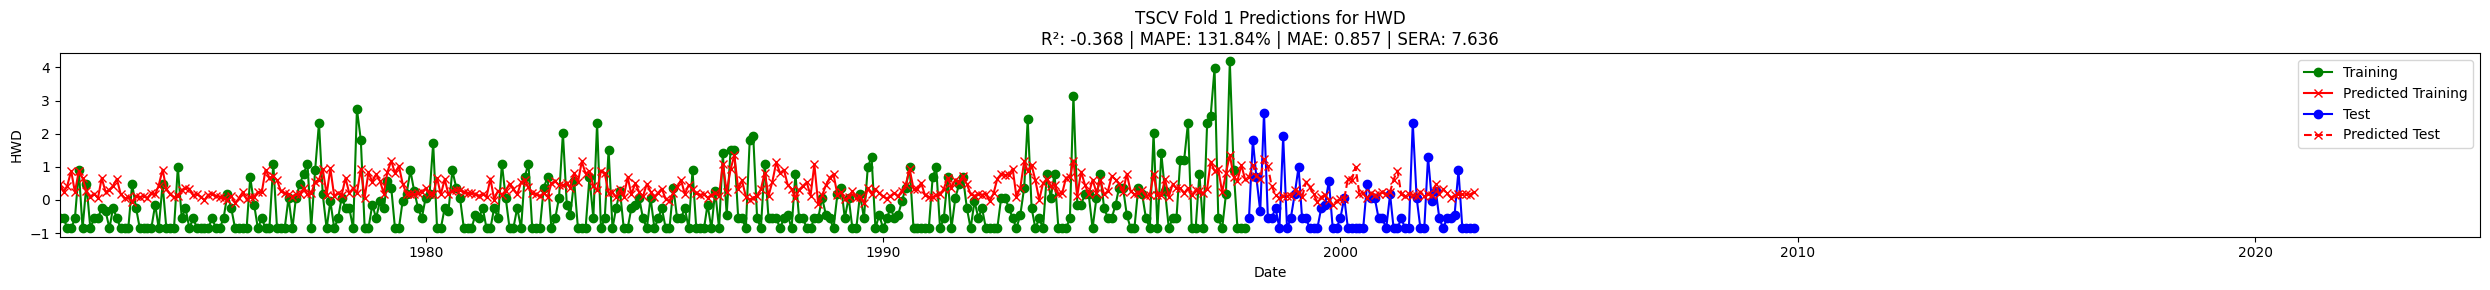

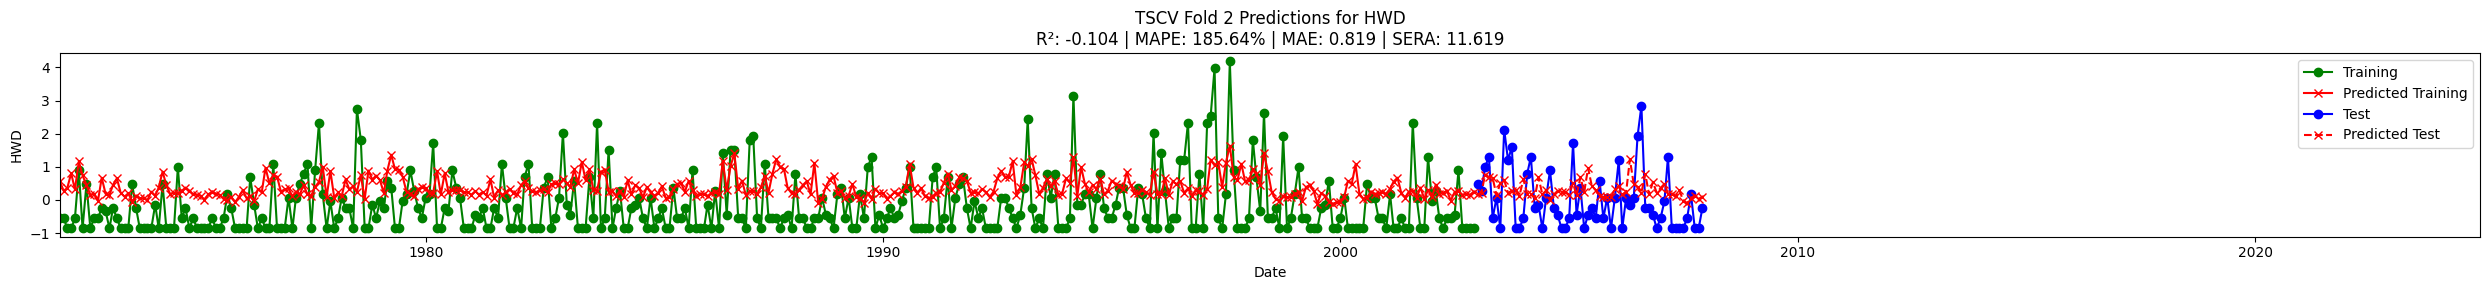

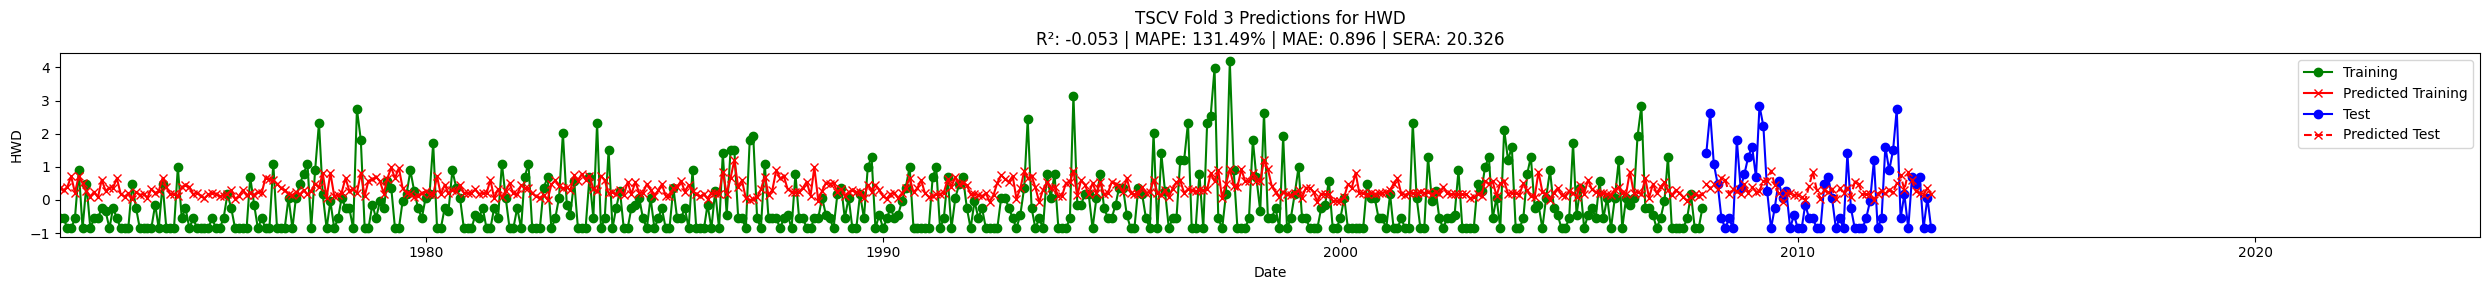

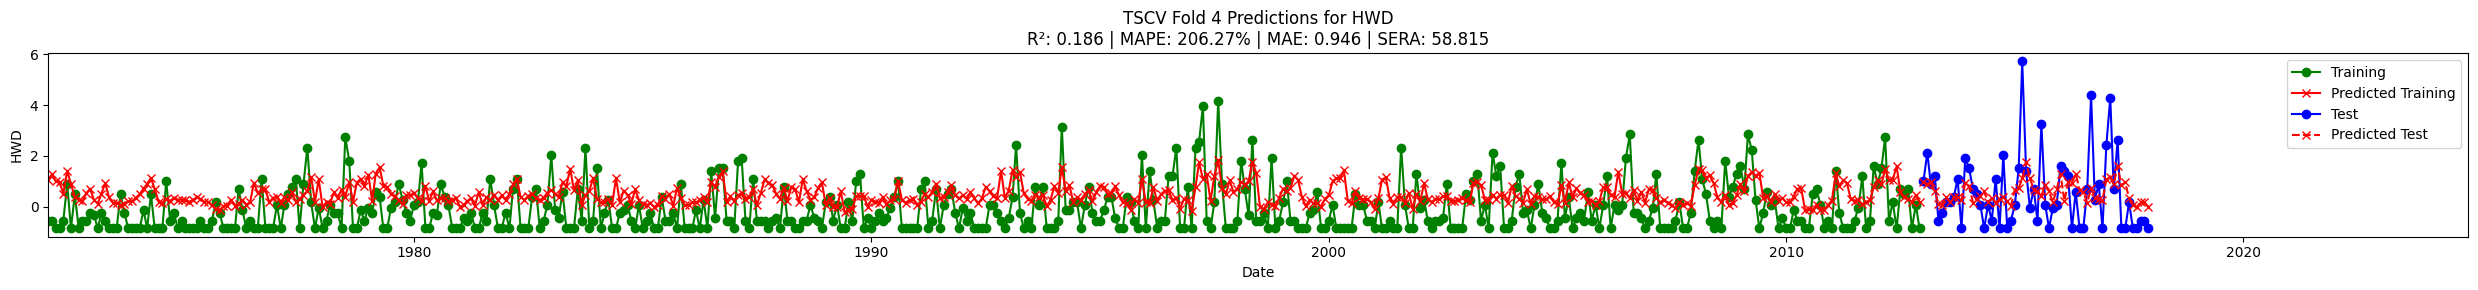

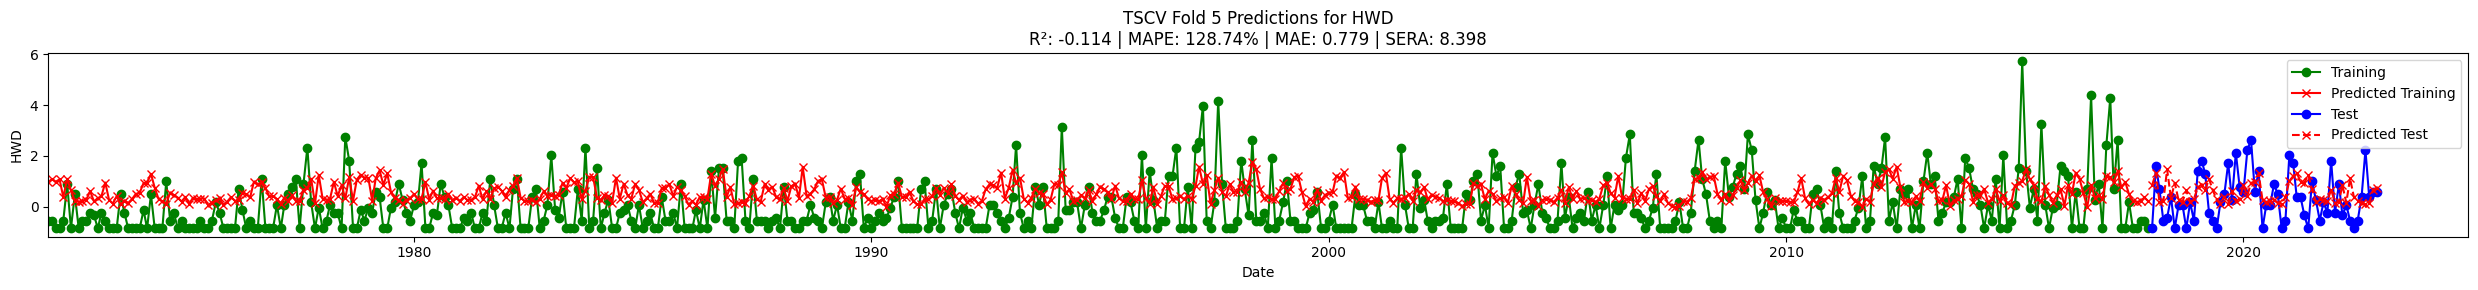

In [7]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {1: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_year.parquet")}
    model = Sequential([
    SimpleRNN(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["RNN16"], 60, id, loss_fn=SERA(bounds=bounds,T=100), whole_year=True)
    experiment_1.execute_experiment(label_plot="HWD")

### MAE

Executing 978f49d7 iter 1
Train predicting  1 RNN16
Epoch 1/200
69/69 [==============================] - 1s 4ms/step - loss: 0.8595 - val_loss: 0.8603
Epoch 2/200
69/69 [==============================] - 0s 2ms/step - loss: 0.7787 - val_loss: 0.8575
Epoch 3/200
69/69 [==============================] - 0s 2ms/step - loss: 0.7402 - val_loss: 0.8719
Epoch 4/200
69/69 [==============================] - 0s 2ms/step - loss: 0.7226 - val_loss: 0.8880
Epoch 5/200
69/69 [==============================] - 0s 2ms/step - loss: 0.7050 - val_loss: 0.9032
Epoch 6/200
69/69 [==============================] - 0s 2ms/step - loss: 0.6958 - val_loss: 0.9161
Epoch 7/200
69/69 [==============================] - 0s 2ms/step - loss: 0.6840 - val_loss: 0.9284
Epoch 8/200
69/69 [==============================] - 0s 2ms/step - loss: 0.6785 - val_loss: 0.9282
Epoch 9/200
69/69 [==============================] - 0s 2ms/step - loss: 0.6763 - val_loss: 0.9316
Epoch 10/200
69/69 [==============================] - 0s 

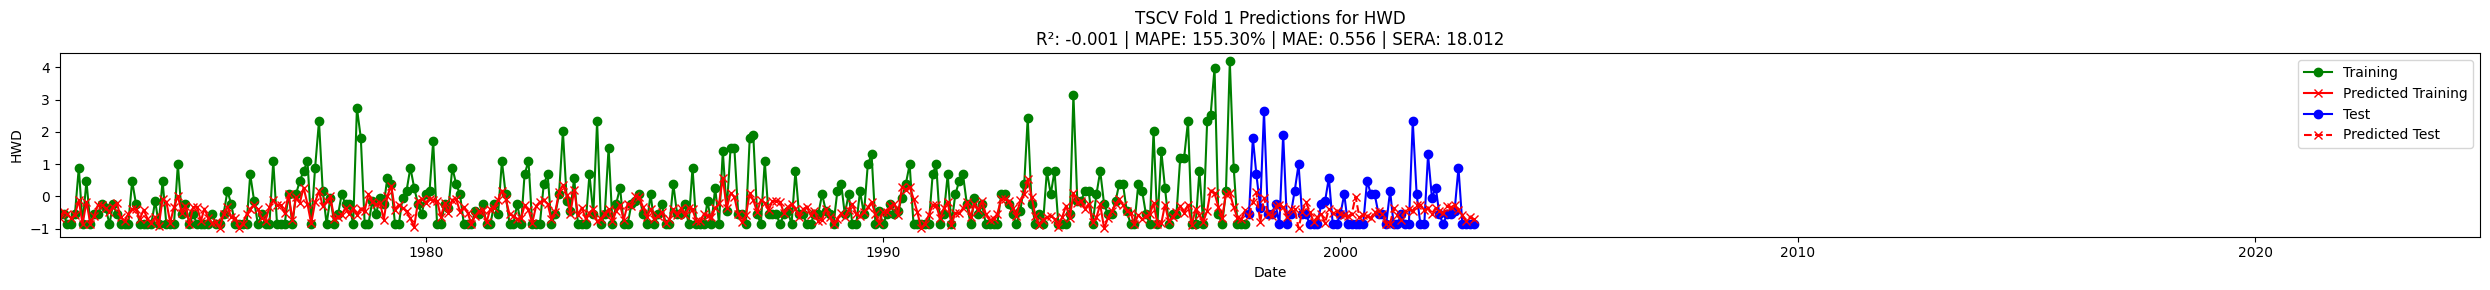

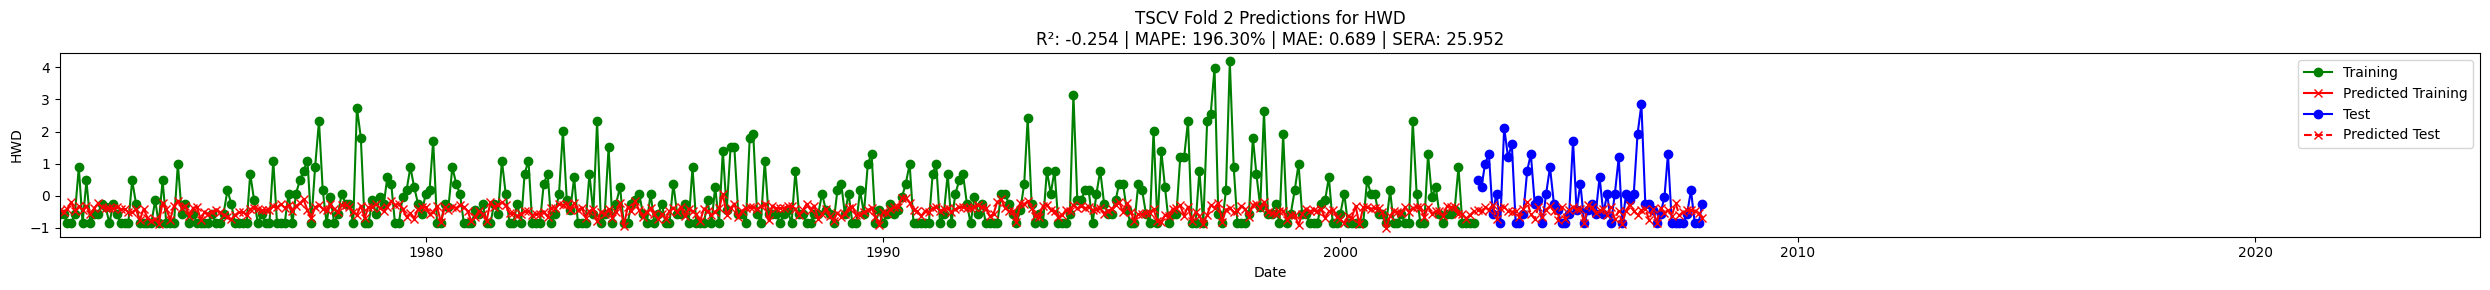

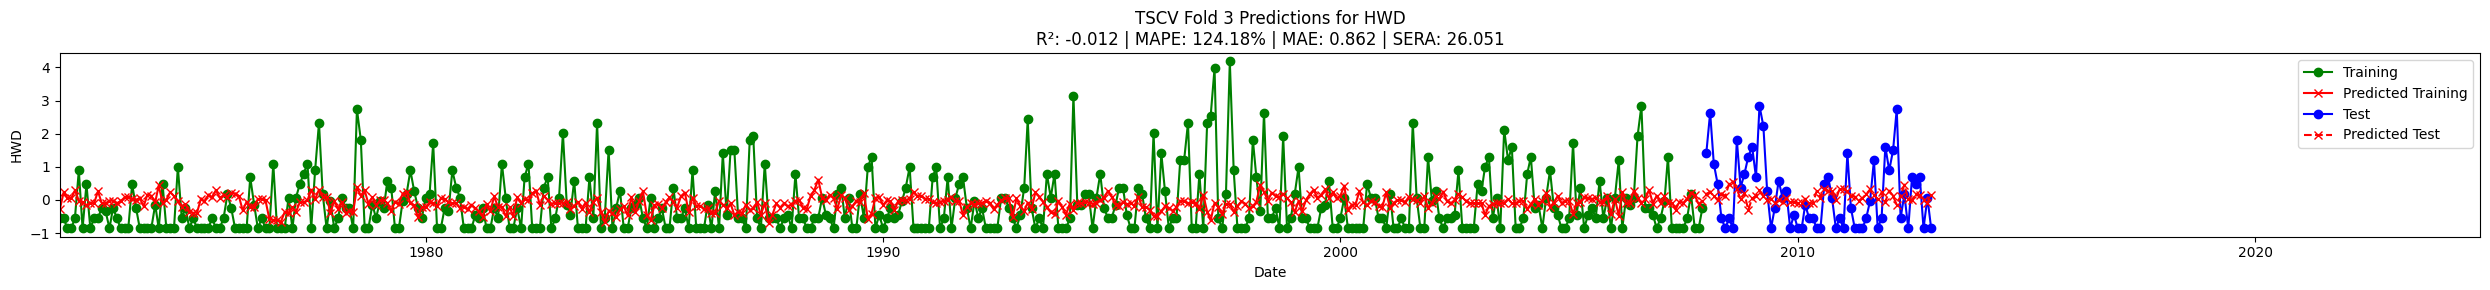

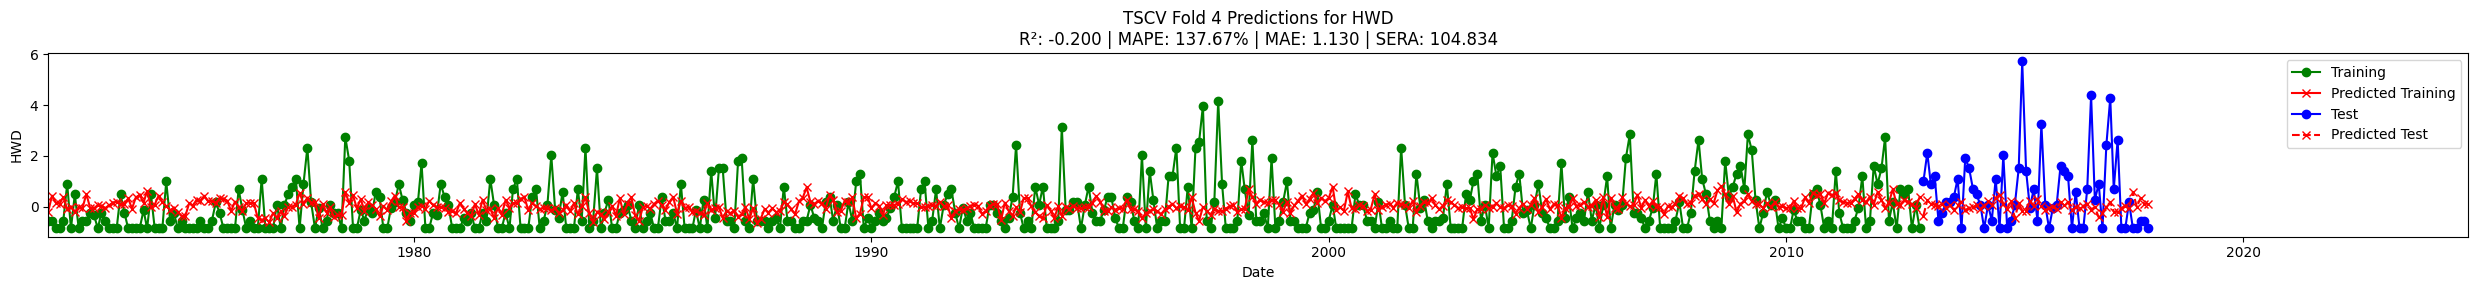

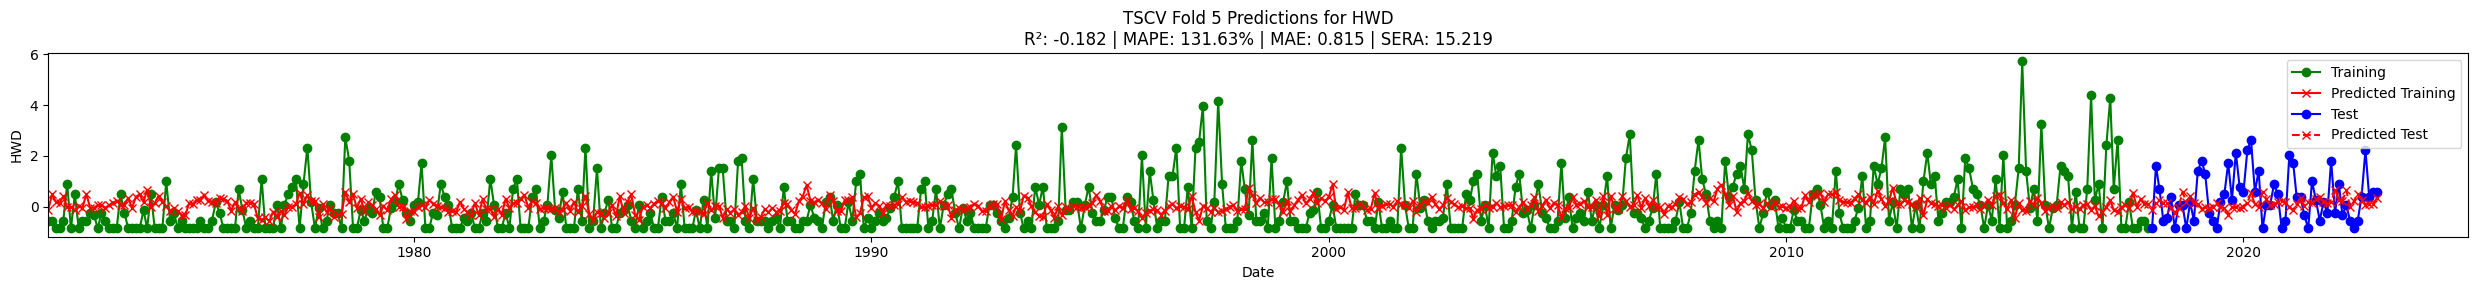

In [8]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {1: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_year.parquet")}
    model = Sequential([
    SimpleRNN(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["RNN16"], 60, id, whole_year=True)
    experiment_1.execute_experiment(label_plot="HWD")

### Linear Reg

Executing 978f49d7 iter 1
Train predicting  1 Linear


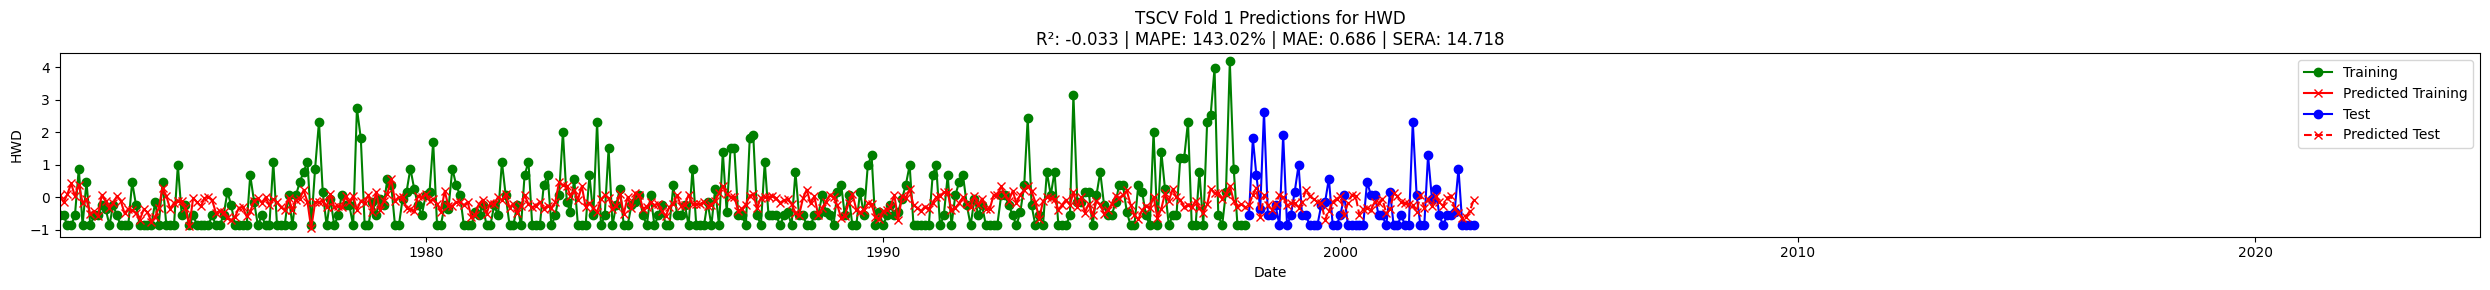

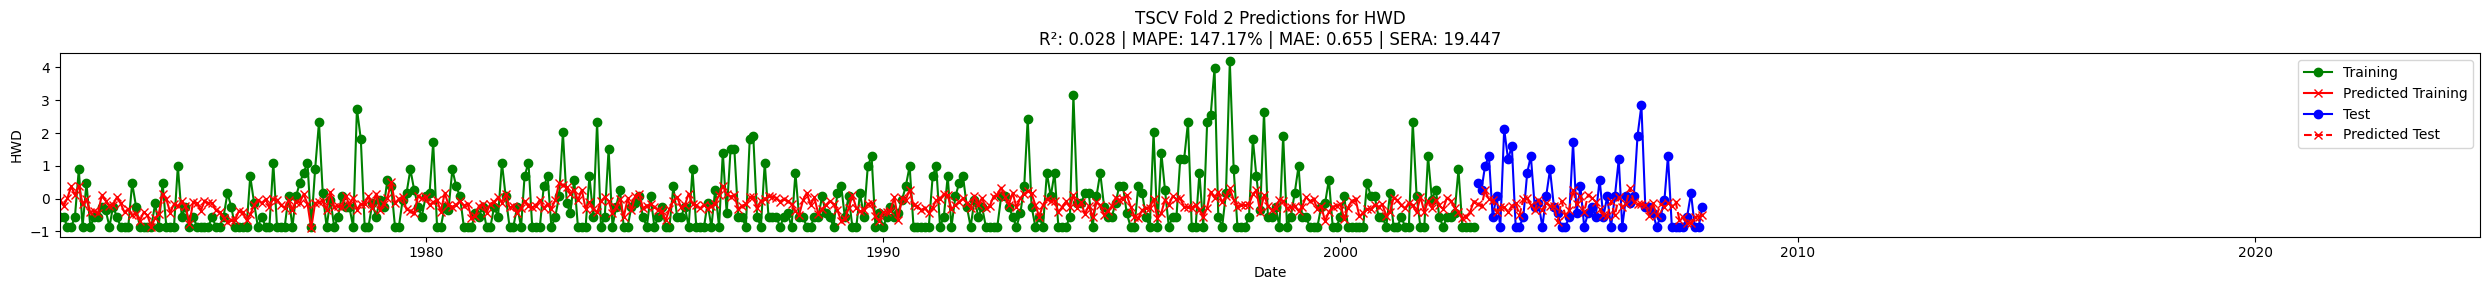

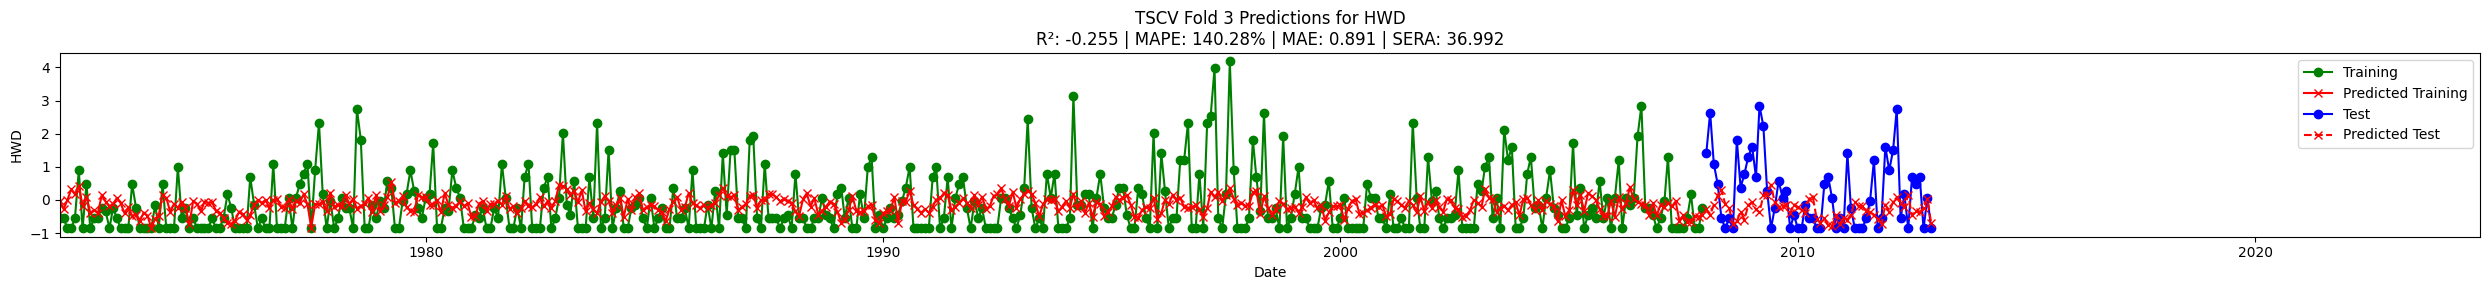

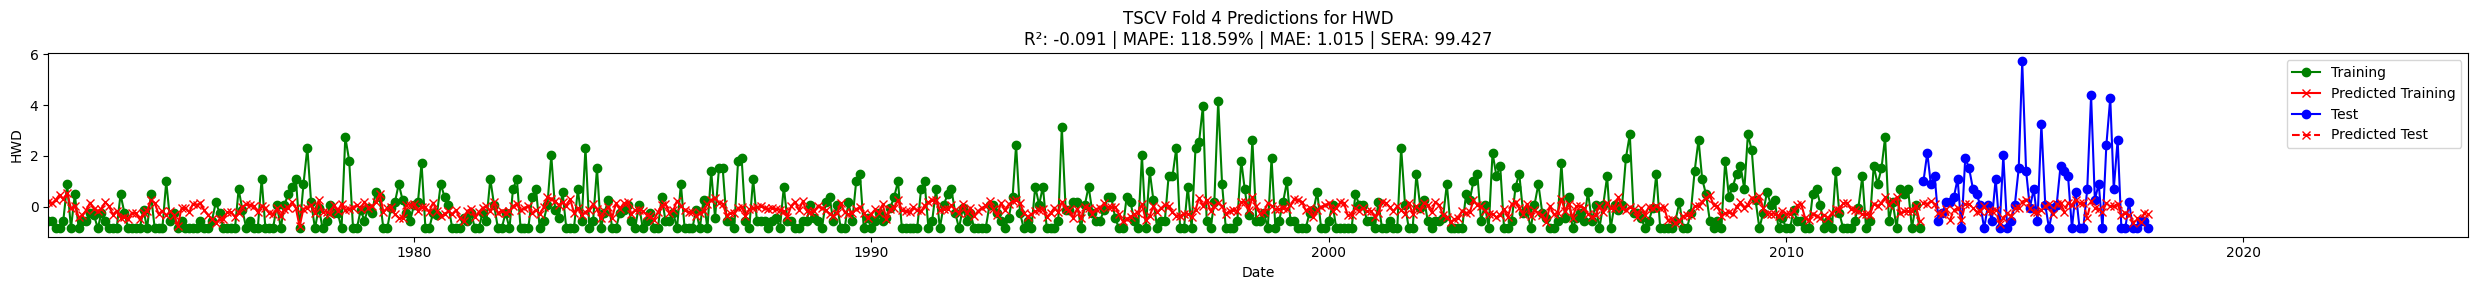

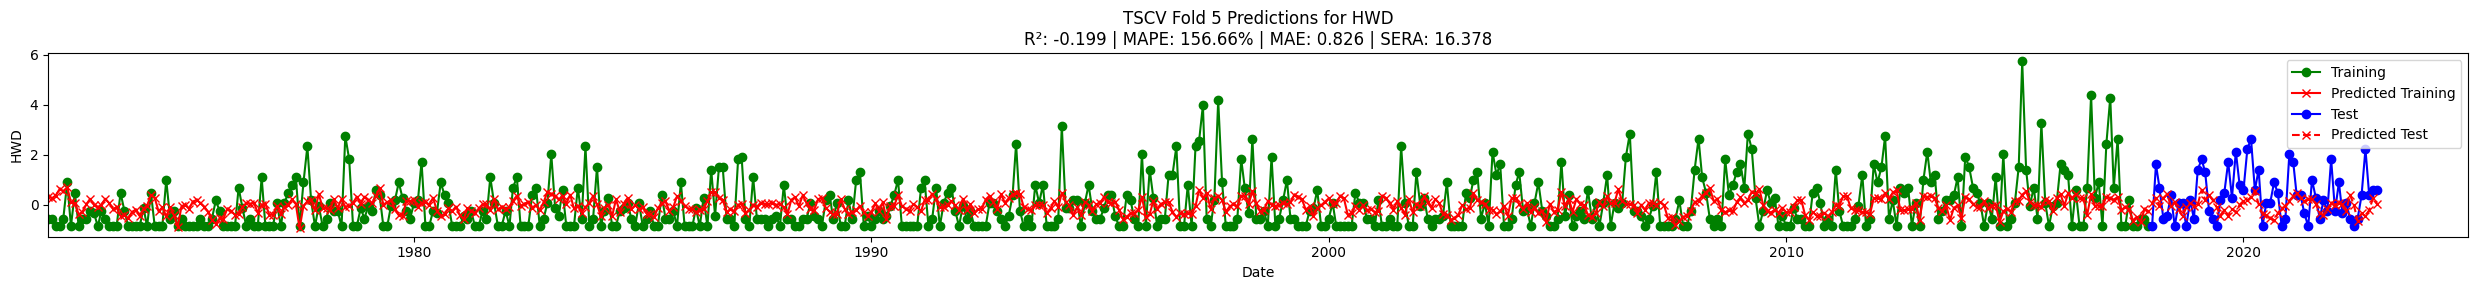

In [9]:
k=0
from sklearn.linear_model import LinearRegression

for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {1: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_year.parquet")}
    model = LinearRegression()
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["Linear"], 60, id, whole_year=True)
    experiment_1.execute_experiment(label_plot="HWD")

### Adjusting initial weight

In [8]:
ids_to_execute = ["311dd366"]
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
8c5bce37,index_8c5bce37.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
880b8b63,index_880b8b63.parquet,max,1,MSL,260|284|-44|-17,NoRef,1972-2022
aa75d48e,index_aa75d48e.parquet,anom,1,U,287|289|-42|-33,1980-2010,1972-2022
88249a81,index_88249a81.parquet,anom,1,MSL,286|292|-52|-40,1980-2010,1972-2022
f6e4a28a,index_f6e4a28a.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
7728bf70,index_7728bf70.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022
a66b8219,index_a66b8219.parquet,anom,1,MSL,291|295|-38|-30,1980-2010,1972-2022


Executing 311dd366 iter 1
Train predicting  1 RNN16
Epoch 1/200
69/69 [==============================] - 24s 81ms/step - loss: 25.5154 - val_loss: 30.4736
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 22.9327 - val_loss: 28.7743
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 21.3628 - val_loss: 27.2411
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 20.5618 - val_loss: 26.0100
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 19.0620 - val_loss: 24.9581
Epoch 6/200
69/69 [==============================] - 0s 4ms/step - loss: 18.2659 - val_loss: 23.6476
Epoch 7/200
69/69 [==============================] - 0s 4ms/step - loss: 17.5777 - val_loss: 23.2655
Epoch 8/200
69/69 [==============================] - 0s 4ms/step - loss: 17.1044 - val_loss: 22.8473
Epoch 9/200
69/69 [==============================] - 0s 6ms/step - loss: 16.7425 - val_loss: 22.2219
Epoch 10/200
69/69 [=================

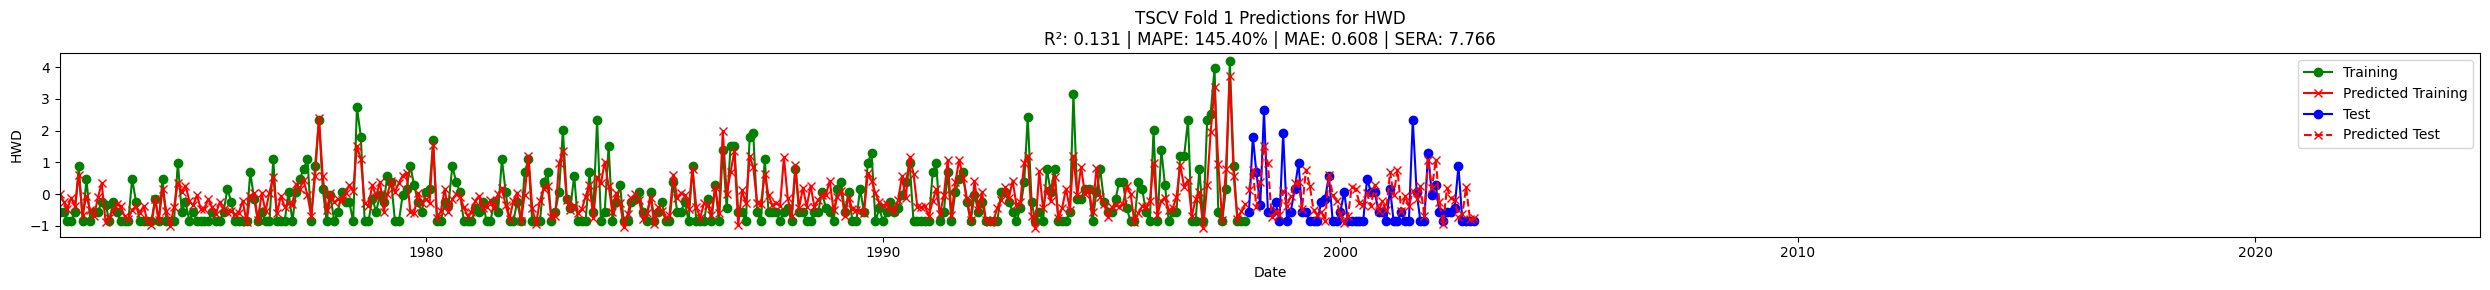

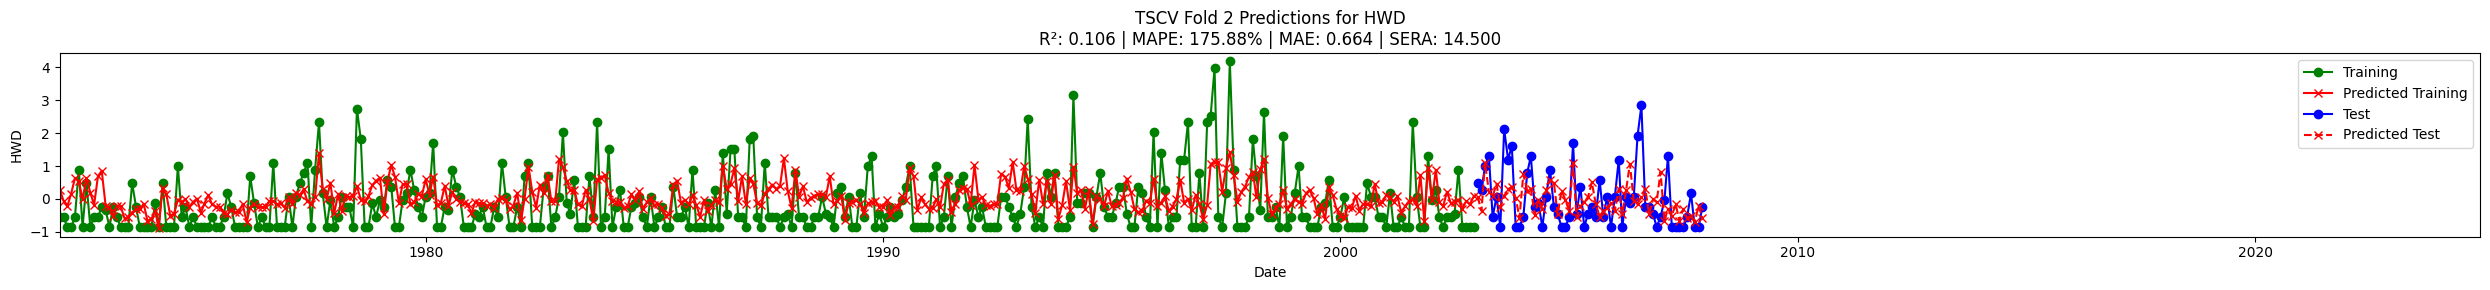

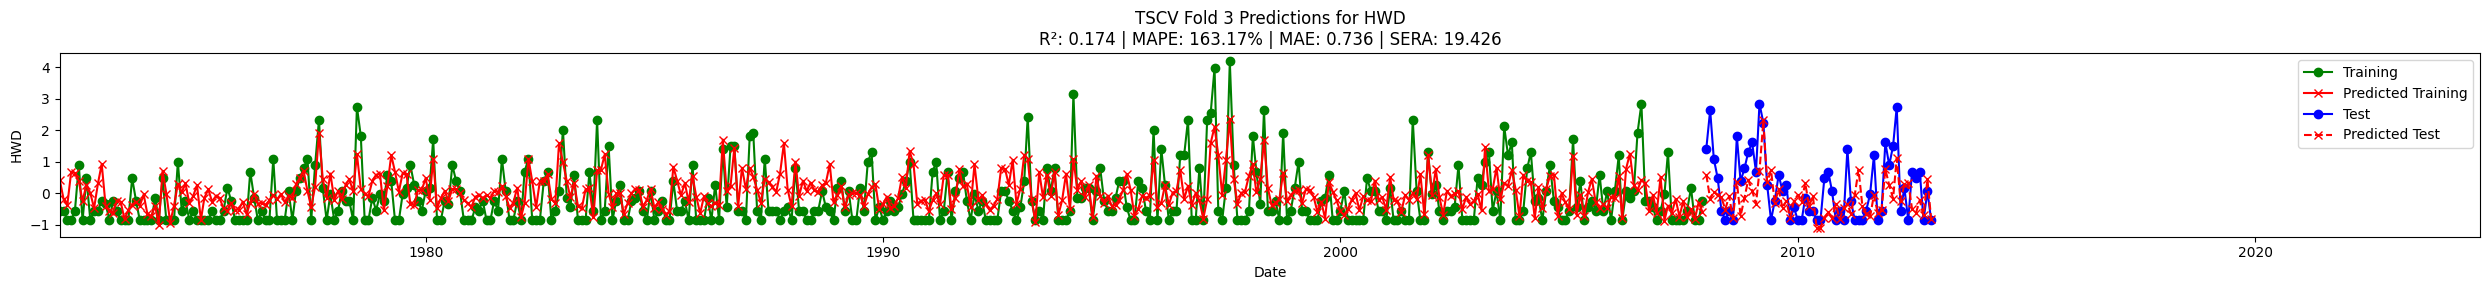

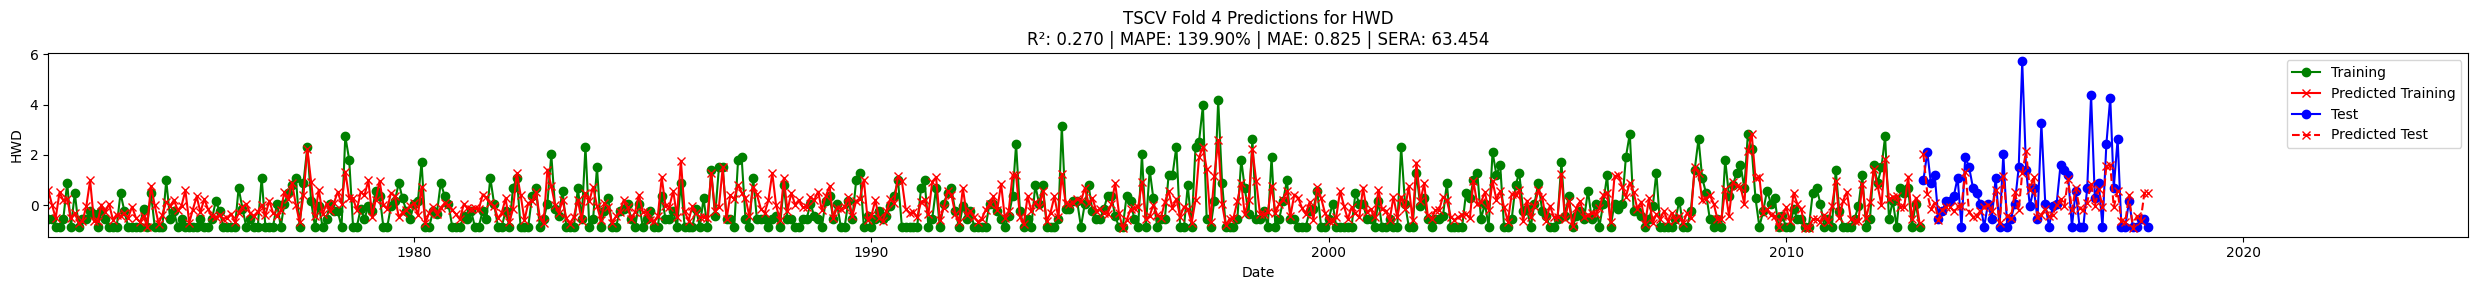

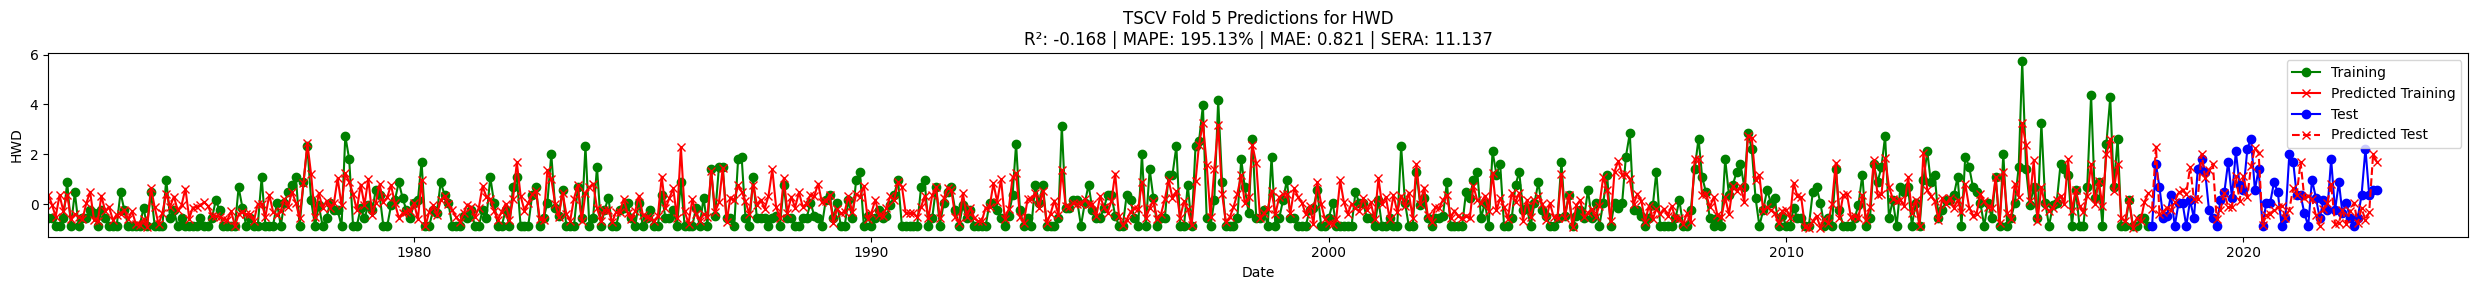

In [9]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {1: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_year.parquet")}
    model = Sequential([
    SimpleRNN(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["RNN16"], 60, id, loss_fn=SERA(bounds=bounds,T=100,fn='piecewise2', initial_weight=0.3), whole_year=True)
    experiment_1.execute_experiment(label_plot="HWD")